# Question 1
---

In [ ]:
P_A = 0.9  # Probability of passing the class
P_Ac = 1 - P_A  # Probability of not passing the class
P_B_given_A = 0.6  # Probability of answering quickly given passing
P_B_given_Ac = 0.3  # Probability of answering quickly given not passing

# Applying Bayes' Theorem
P_A_given_B = (P_B_given_A * P_A) / ((P_B_given_A * P_A) + (P_B_given_Ac * P_Ac))

# Print the result
print(f"Proportion of students who pass given they answer quickly: {P_A_given_B:.3f}")

# Question 2
---

What is the posterior distribution?
Answer: A Dirichlet

With which updated parameters?
Answer: α + x

What is the prior?
Answer: A Dirichlet with parameter α

# Question 3
---

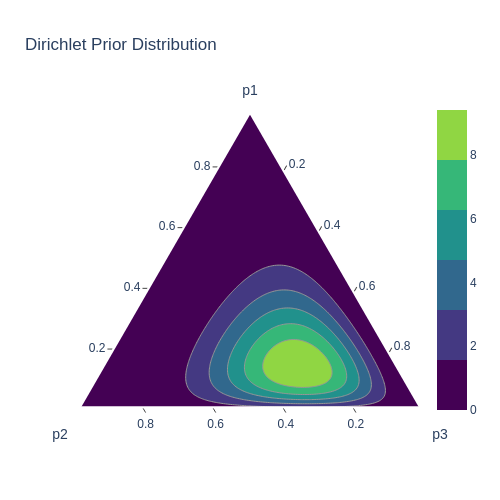

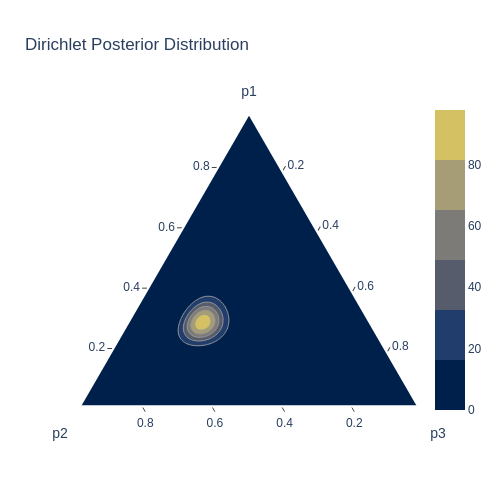

In [4]:
import numpy as np
from scipy.stats import dirichlet
import plotly.figure_factory as ff

# Generate grid points for Dirichlet density
n_points = 200
p1 = np.linspace(0, 1, n_points)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, n_points)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
p = np.c_[p1, p2, p3]

# Remove invalid points where p1 + p2 + p3 > 1
valid_indices = (p1 >= 0) & (p2 >= 0) & (p3 >= 0)
p = p[valid_indices]

# Define Dirichlet parameters
alpha_prior = np.array([2.0, 3.0, 5.0])  # Skewed Prior
alpha_posterior = alpha_prior + np.array([30, 50, 20])  # Posterior parameters

# Compute densities
prior_densities = dirichlet(alpha_prior).pdf(p.T)
posterior_densities = dirichlet(alpha_posterior).pdf(p.T)

# Visualize Dirichlet Prior
fig_prior = ff.create_ternary_contour(
    np.array([p[:, 0], p[:, 1], p[:, 2]]),
    prior_densities,
    pole_labels=["p1", "p2", "p3"],
    interp_mode="cartesian",
    colorscale="Viridis",
    showscale=True,
    title=dict(text="Dirichlet Prior Distribution")
)
fig_prior.show('png')

# Visualize Dirichlet Posterior
fig_posterior = ff.create_ternary_contour(
    np.array([p[:, 0], p[:, 1], p[:, 2]]),
    posterior_densities,
    pole_labels=["p1", "p2", "p3"],
    interp_mode="cartesian",
    colorscale="Cividis",
    showscale=True,
    title=dict(text="Dirichlet Posterior Distribution")
)
fig_posterior.show('png')